In [1]:
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use("dark_background")

import ai_prentice_wasserstein
import utils

from time import time

In [2]:
pendulum_data = np.load("trajectories/pendulum.npz")
data = pendulum_data["data"]

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice("pendulum")

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[1]
energy = pendulum_data["params"].T[0]

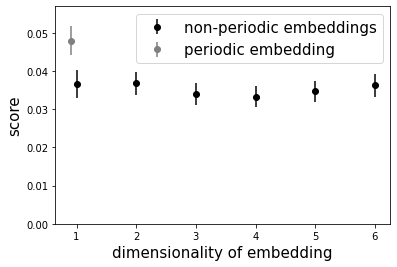

In [6]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
plt.savefig("pend_scores.pdf")
plt.show()

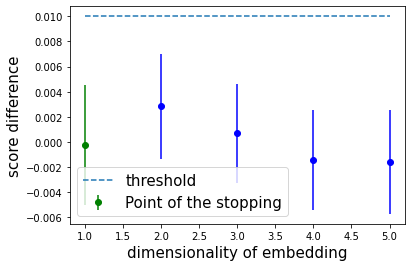

In [7]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
plt.savefig("pend_diffs.pdf")
plt.show()

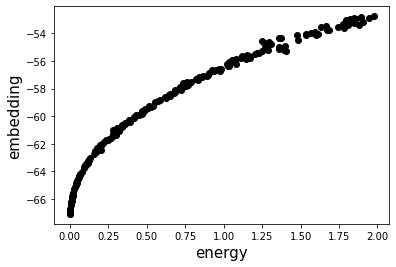

In [8]:
utils.plot_embedding_vs_conserved_quantity(plt.gca(), embedding, energy, "energy")
plt.savefig("pend_energy.pdf")
plt.show()

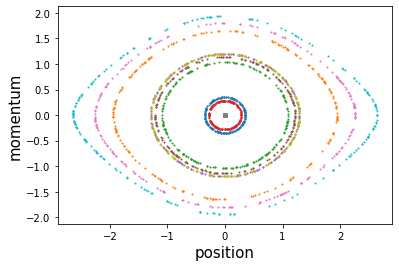

In [9]:
fig, ax = plt.subplots()
for traj in data[:10]:
    ax.scatter(*traj.T, s=1)
ax.set_xlabel("position", fontsize=15)
ax.set_ylabel("momentum", fontsize=15)
plt.savefig("pend_data.pdf")
plt.show()

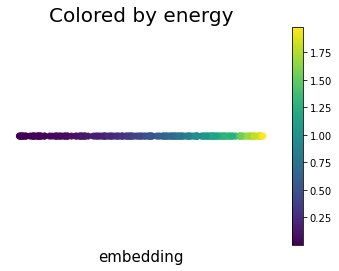

In [10]:
utils.plot_1d(plt.figure(), plt.gca(), embedding, energy, "energy")
plt.savefig("pend_1d.pdf")
plt.show()

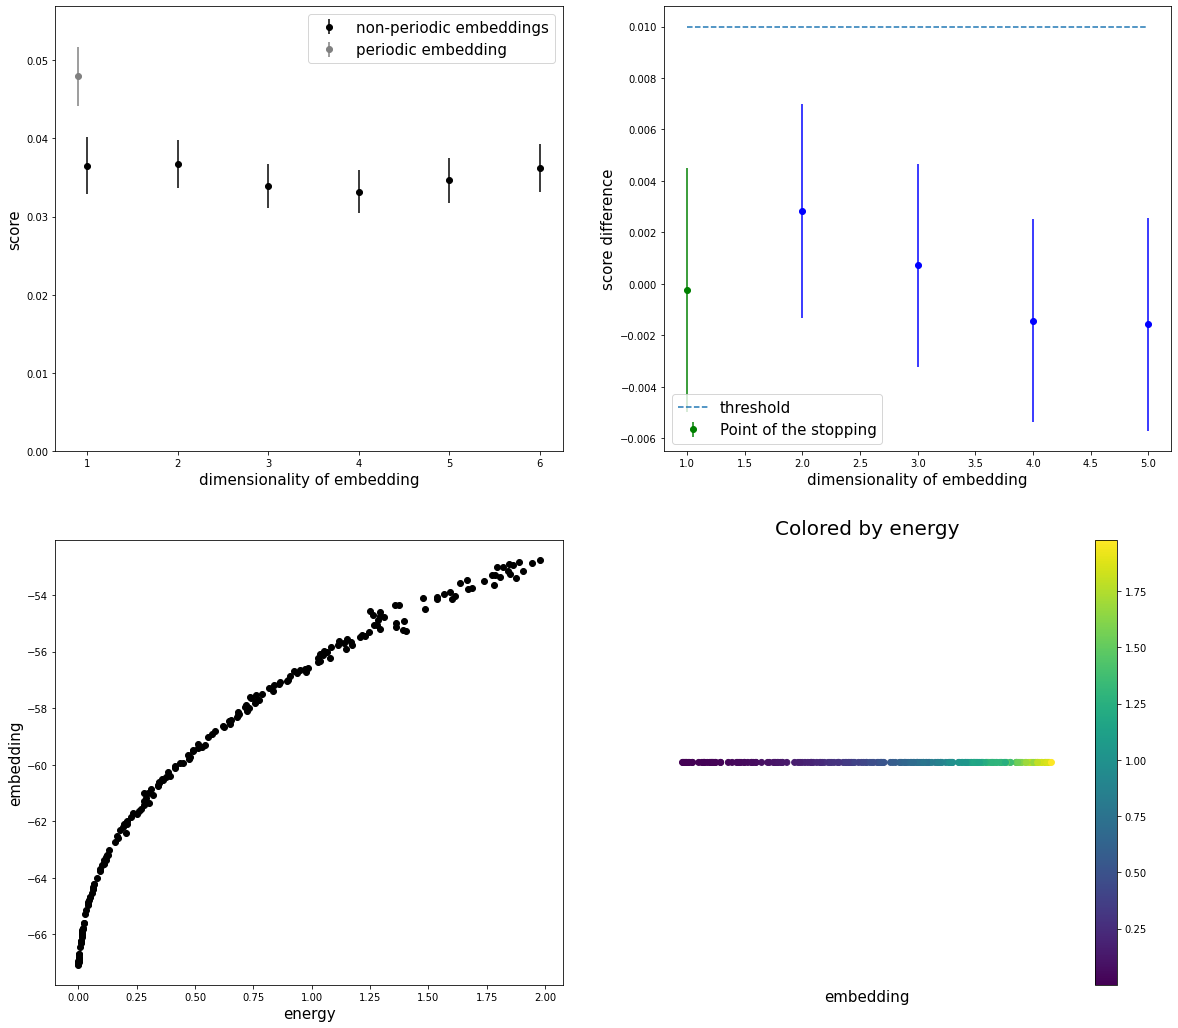

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

utils.plot_scores(axes[0][0], ai_prentice.scores, ai_prentice.errors)
utils.plot_score_diffs(axes[0][1], ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)

utils.plot_embedding_vs_conserved_quantity(axes[1][0], embedding, energy, "energy")
utils.plot_1d(fig, axes[1][1], embedding, energy, "energy")

plt.savefig(f"pend_all.pdf", bbox_inches="tight")